Import necessary packages.

In [56]:
import json
from keybert import KeyBERT
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import all titles, saved the titles in:
- a list holding all titles for the 4 year period
- a dictionary, holding data as year: titles

In [11]:
files = [
    'papers-semeval-2021.json',
    'papers-semeval-2022.json',
    'papers-semeval-2023.json',
    'papers-semeval-2024.json'
]

all_titles = []
titles_by_year = dict()

for filename in files:
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
        year = filename[15:19]
        titles_by_year[year] = []
        for item in data:
            title = ''
            title_parts = item['title'].split(':', 1)
            if (len(title_parts) > 1): 
                title = title_parts[1]
            else:
                title = title_parts[0]

            all_titles.append(title)
            titles_by_year[year].append(title)

Initialize the KeyBERT model.

In [16]:
kw_model = KeyBERT()

Extract keywords from the whole corpus.

In [60]:
keywords = kw_model.extract_keywords(
    ' '.join(all_titles),
    keyphrase_ngram_range=(1, 1),
    stop_words='english',
    top_n=20
)

for kw in keywords:
    print(kw[0])

wordnet
lexical
lexicon
lexicographic
multilingual
multiword
linguistic
lingual
word2vec
contextualization
corpora
contextualising
dictionary
contextual
contextualized
complexity
multitask
monolingual
paraphrasing
nlp


Extract keywords separately for each year.

In [53]:
keywords_by_year = dict()
for year, titles in titles_by_year.items():
    keywords = kw_model.extract_keywords(
        ' '.join(titles),
        keyphrase_ngram_range=(1, 1),
        stop_words='english',
        top_n=15
    )
    keywords_by_year[year] = keywords

    print(year)
    for kw in keywords:
        print(kw[0])
    print('---------------')

2021
wordnet
lexical
multilingual
linguistic
lingual
word2vec
corpora
contextualising
contextual
contextualized
complexity
paraphrasing
nlp
speech
comprehension
---------------
2022
multilingual
monolingual
dictionaries
crosslingual
lingual
multitask
dictionary
translations
idioms
lexicographic
multiword
linguistic
linguistics
embeddings
contextual
---------------
2023
multilingual
wordnet
lingual
linguistic
contextualized
contextual
nlp
texts
monolingual
semantic
textual
annotator
text
modality
entailment
---------------
2024
linguistic
autoencoders
generative
ai
semantic
supervised
linguistics
dialogues
embedder
textual
multilingual
lingual
neural
dialogue
entailment
---------------


Plot keywords in time using the keyword scores and a sns clustermap.

Use the monogram keywords extracted by year.

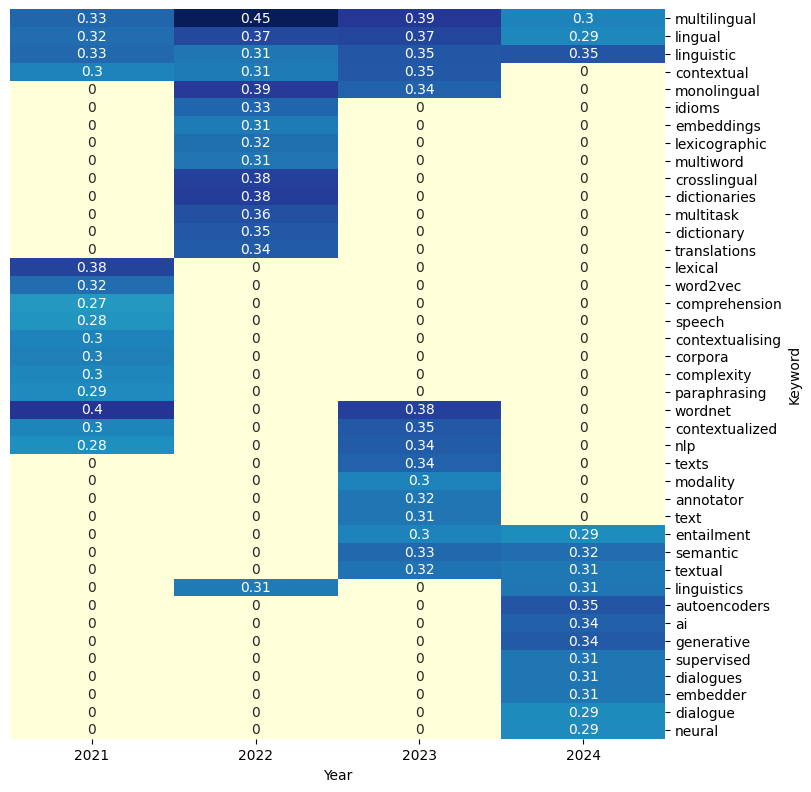

In [59]:
years = sorted(keywords_by_year.keys())

# Extract all unique keywords
all_keywords = set()
for yr in years:
    for (kw, score) in keywords_by_year[yr]:
        all_keywords.add(kw)
all_keywords = sorted(all_keywords)

# Create a matrix with rows as keywords and columns as years
matrix = np.zeros((len(all_keywords), len(years)))
for i, kw in enumerate(all_keywords):
    for j, yr in enumerate(years):
        # Find the score if present; if not, assign 0
        score = next((s for (w,s) in keywords_by_year[yr] if w == kw), 0.0)
        matrix[i, j] = score

# Create the clustermap
g = sns.clustermap(
    matrix,
    yticklabels=all_keywords,
    xticklabels=years,
    cmap="YlGnBu",
    annot=True,
    col_cluster=False,
    cbar_pos=None
)

# Hide the dendrograms
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

g.ax_heatmap.set_xlabel("Year")
g.ax_heatmap.set_ylabel("Keyword")
plt.tight_layout()
plt.show()